# 1. Collecting Reviews

## Setting Up Beautiful Soup and Requests

In [130]:
# %pip install requests beautifulsoup4
# %pip install nltk
# %pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 3.8 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [141]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
from matplotlib import pyplot as plt
from textblob import Word
from textblob import TextBlob

nltk.download("stopwords")
from nltk.corpus import stopwords

nltk.download("wordnet")
nltk.download("omw-1.4")


%load_ext jupyter_black

The jupyter_black extension is already loaded. To reload it, use:
  %reload_ext jupyter_black


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/valentinmonney/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/valentinmonney/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/valentinmonney/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
# Make a request to Yelp to get the raw HTML document using requests
r = requests.get("https://www.yelp.com/biz/mcdonalds-los-angeles-106")

In [4]:
# Check the status of that call
r.status_code

200

In [5]:
# View the raw response
r.text

'<!DOCTYPE html><html lang="en-US" prefix="og: http://ogp.me/ns#" style="margin: 0;padding: 0; border: 0; font-size: 100%; font: inherit; vertical-align: baseline;"><head><script>document.documentElement.className=document.documentElement.className.replace(/\x08no-js\x08/,"js");</script><meta http-equiv="Content-Type" content="text/html; charset=UTF-8" /><meta http-equiv="Content-Language" content="en-US" /><meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no"><link rel="mask-icon" sizes="any" href="https://s3-media0.fl.yelpcdn.com/assets/srv0/yelp_large_assets/b2bb2fb0ec9c/assets/img/logos/yelp_burst.svg" content="#FF1A1A"><link rel="shortcut icon" href="https://s3-media0.fl.yelpcdn.com/assets/srv0/yelp_large_assets/dcfe403147fc/assets/img/logos/favicon.ico"><script> window.ga=window.ga||function(){(ga.q=ga.q||[]).push(arguments)};ga.l=+new Date;window.ygaPageStartTime=new Date().getTime();</script><script>\n            window.yelp = window.yelp || {};\

## Convert Text to Soup

In [6]:
# Convert raw HTML to soup
soup = BeautifulSoup(r.text, 'html.parser')

In [13]:
# Example of getting all the links in a page
soup.find_all("a")

[<a class="logo-link__09f24__fS20h css-f4x8dl" href="/" role="link">Yelp</a>,
 <a class="header-link__09f24__dlphu" href="/writeareview"><div class="css-cq5uiq"><div class="notification-wrapper__09f24__Synq6 css-1jq1ouh"><p class="header-link-text__09f24__LhRgF css-gutk1c" data-font-weight="semibold">Write a Review</p></div></div></a>,
 <a class="login-button__09f24__JVeQy css-1trqlu6" data-activated="false" data-button="true" href="/login?return_url=https%3A%2F%2Fwww.yelp.com%2Fbiz%2Fmcdonalds-los-angeles-106"><span class="css-1enow5j" data-font-weight="semibold">Log In</span></a>,
 <a class="hide-below-b__09f24__vjFMq css-1y05e5" data-activated="false" data-button="true" href="/signup?return_url=https%3A%2F%2Fwww.yelp.com%2Fbiz%2Fmcdonalds-los-angeles-106"><span class="css-1enow5j" data-font-weight="semibold">Sign Up</span></a>,
 <a class="header-link_anchor__09f24__eCD4u" href="/search?find_desc=Restaurants&amp;find_loc=San%20Francisco%2C%20CA" tabindex="0"><span class="css-qgunke">

In [21]:
# Grab all of the reviews where the tag is span
# where Lang = en and class includes raw__
regex = re.compile("raw__")
results = soup.find_all("span", {"lang": "en"}, class_=regex)

In [25]:
reviews = [review.text for review in results]

In [28]:
reviews

['It\'s not a 5-star retardant ofc, but as McDonald\'s goes, go to this one. This one is a well oiled McDonald\'s. If it only has 2.5 stars it must be because of peoples\' prejudice against fast food joints. Yes it\'s all those things. But if you like or want Mickey D\'s, go to this one. You could do so much worse, like the one on La Cienega, these places are owned by different people and it shows. The staff is friendly too. They actually are open 24/7, and my order was dee-lish. So if you\'re reviewing it, don\'t compare it with mastros, compare it with any other McDonalds you can think of and ask yourself--how\'s this one compare? If the answer is at least "favorably", i recommend 5-stars.',
 "This place can get a little tricky and can have a lot going on in the area sometimes but you can't beat the food here I will tell you that! I was on YouTube and saw a hack that you can try the Mcchicken and McDouble and put it together like it's a Big Mac. That's exactly what I did! And just li

## Scraping Multiple Pages

In [36]:
# Dynamic link generation
links = [
    f"https://www.yelp.com/biz/mcdonalds-los-angeles-106?start={10+x*10}"
    for x in range(13)
]
links.insert(0, "https://www.yelp.com/biz/mcdonalds-los-angeles-106")

In [35]:
links

['https://www.yelp.com/biz/mcdonalds-los-angeles-106',
 'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=10',
 'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=20',
 'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=30',
 'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=40',
 'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=50',
 'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=60',
 'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=70',
 'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=80',
 'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=90',
 'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=100',
 'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=110',
 'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=120',
 'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=130']

In [38]:
reviews = []
for link in links:
    r = requests.get(link)
    soup = BeautifulSoup(r.text, "html.parser")
    results = soup.find_all("span", {"lang": "en"}, class_=regex)
    reviews = [*reviews, *[result.text for result in results]]

In [39]:
len(reviews)

135

In [40]:
reviews

['It\'s not a 5-star retardant ofc, but as McDonald\'s goes, go to this one. This one is a well oiled McDonald\'s. If it only has 2.5 stars it must be because of peoples\' prejudice against fast food joints. Yes it\'s all those things. But if you like or want Mickey D\'s, go to this one. You could do so much worse, like the one on La Cienega, these places are owned by different people and it shows. The staff is friendly too. They actually are open 24/7, and my order was dee-lish. So if you\'re reviewing it, don\'t compare it with mastros, compare it with any other McDonalds you can think of and ask yourself--how\'s this one compare? If the answer is at least "favorably", i recommend 5-stars.',
 "This place can get a little tricky and can have a lot going on in the area sometimes but you can't beat the food here I will tell you that! I was on YouTube and saw a hack that you can try the Mcchicken and McDouble and put it together like it's a Big Mac. That's exactly what I did! And just li

# 2. Analysing the Reviews

## Calculating Text Metrics

In [47]:
df = pd.DataFrame(reviews, columns=["reviews"])

In [48]:
df.head()

,reviews
0,"It's not a 5-star retardant ofc, but as McDona..."
1,This place can get a little tricky and can hav...
2,Ketchup in the bag. Yes of course sir. No ketc...
3,This location was ok. Went there yesterday for...
4,They are now open 24 hours! Yay!!! Totally he...


In [61]:
df["word_count"] = df["reviews"].str.split().str.len()
df["char_count"] = df["reviews"].str.len()

In [65]:
df

,reviews,word_count,char_count
0,"It's not a 5-star retardant ofc, but as McDona...",128,689
1,This place can get a little tricky and can hav...,76,354
2,Ketchup in the bag. Yes of course sir. No ketc...,18,97
3,This location was ok. Went there yesterday for...,41,210
4,They are now open 24 hours! Yay!!! Totally he...,17,93
...,...,...,...
130,this place is doesnt cater to the needs of the...,41,241
131,"The food is horrible, over salted fries, stale...",49,282
132,This is just another McDonalds. The service is...,36,196
133,"i rarely have fast food, so i'm rarely here (t...",46,230


## Counting Stopwords

In [74]:
stop_words = stopwords.words("english")

In [76]:
df["stopword_count"] = (
    df["reviews"]
    .str.split()
    .apply(lambda words: sum(word in stop_words for word in words))
)

In [82]:
df

,reviews,word_count,char_count,stopword_count
0,"It's not a 5-star retardant ofc, but as McDona...",128,689,56
1,This place can get a little tricky and can hav...,76,354,38
2,Ketchup in the bag. Yes of course sir. No ketc...,18,97,5
3,This location was ok. Went there yesterday for...,41,210,15
4,They are now open 24 hours! Yay!!! Totally he...,17,93,5
...,...,...,...,...
130,this place is doesnt cater to the needs of the...,41,241,18
131,"The food is horrible, over salted fries, stale...",49,282,18
132,This is just another McDonalds. The service is...,36,196,10
133,"i rarely have fast food, so i'm rarely here (t...",46,230,17


In [81]:
df.describe()

,word_count,char_count,stopword_count
count,135.000000,135.000000,135.000000
mean,65.844444,350.162963,27.222222
std,46.946439,251.979157,20.871557
min,8.000000,50.000000,2.000000
25%,31.500000,169.000000,12.000000
50%,50.000000,263.000000,22.000000
75%,84.500000,450.500000,36.000000
max,274.000000,1455.000000,115.000000


# 3. Cleaning the Dataset

## Lowercasing all Words

In [86]:
df["review_lower"] = df["reviews"].str.lower()

In [87]:
df

,reviews,word_count,char_count,stopword_count,review_lower
0,"It's not a 5-star retardant ofc, but as McDona...",128,689,56,"it's not a 5-star retardant ofc, but as mcdona..."
1,This place can get a little tricky and can hav...,76,354,38,this place can get a little tricky and can hav...
2,Ketchup in the bag. Yes of course sir. No ketc...,18,97,5,ketchup in the bag. yes of course sir. no ketc...
3,This location was ok. Went there yesterday for...,41,210,15,this location was ok. went there yesterday for...
4,They are now open 24 hours! Yay!!! Totally he...,17,93,5,they are now open 24 hours! yay!!! totally he...
...,...,...,...,...,...
130,this place is doesnt cater to the needs of the...,41,241,18,this place is doesnt cater to the needs of the...
131,"The food is horrible, over salted fries, stale...",49,282,18,"the food is horrible, over salted fries, stale..."
132,This is just another McDonalds. The service is...,36,196,10,this is just another mcdonalds. the service is...
133,"i rarely have fast food, so i'm rarely here (t...",46,230,17,"i rarely have fast food, so i'm rarely here (t..."


## Stripping Punctuation

In [91]:
df["review_nopunc"] = df["review_lower"].str.replace("[^\w\s]", "", regex=True)

In [95]:
df

,reviews,word_count,char_count,stopword_count,review_lower,review_nopunc
0,"It's not a 5-star retardant ofc, but as McDona...",128,689,56,"it's not a 5-star retardant ofc, but as mcdona...",its not a 5star retardant ofc but as mcdonalds...
1,This place can get a little tricky and can hav...,76,354,38,this place can get a little tricky and can hav...,this place can get a little tricky and can hav...
2,Ketchup in the bag. Yes of course sir. No ketc...,18,97,5,ketchup in the bag. yes of course sir. no ketc...,ketchup in the bag yes of course sir no ketchu...
3,This location was ok. Went there yesterday for...,41,210,15,this location was ok. went there yesterday for...,this location was ok went there yesterday for ...
4,They are now open 24 hours! Yay!!! Totally he...,17,93,5,they are now open 24 hours! yay!!! totally he...,they are now open 24 hours yay totally helped...
...,...,...,...,...,...,...
130,this place is doesnt cater to the needs of the...,41,241,18,this place is doesnt cater to the needs of the...,this place is doesnt cater to the needs of the...
131,"The food is horrible, over salted fries, stale...",49,282,18,"the food is horrible, over salted fries, stale...",the food is horrible over salted fries stale b...
132,This is just another McDonalds. The service is...,36,196,10,this is just another mcdonalds. the service is...,this is just another mcdonalds the service isn...
133,"i rarely have fast food, so i'm rarely here (t...",46,230,17,"i rarely have fast food, so i'm rarely here (t...",i rarely have fast food so im rarely here tho ...


## Removing Stopwords

In [98]:
df["review_nostop"] = df["review_nopunc"].apply(
    lambda x: " ".join(word for word in x.split() if word not in stop_words)
)

In [99]:
df

,reviews,word_count,char_count,stopword_count,review_lower,review_nopunc,review_nostop
0,"It's not a 5-star retardant ofc, but as McDona...",128,689,56,"it's not a 5-star retardant ofc, but as mcdona...",its not a 5star retardant ofc but as mcdonalds...,5star retardant ofc mcdonalds goes go one one ...
1,This place can get a little tricky and can hav...,76,354,38,this place can get a little tricky and can hav...,this place can get a little tricky and can hav...,place get little tricky lot going area sometim...
2,Ketchup in the bag. Yes of course sir. No ketc...,18,97,5,ketchup in the bag. yes of course sir. no ketc...,ketchup in the bag yes of course sir no ketchu...,ketchup bag yes course sir ketchup cold food b...
3,This location was ok. Went there yesterday for...,41,210,15,this location was ok. went there yesterday for...,this location was ok went there yesterday for ...,location ok went yesterday cup coffee sandwich...
4,They are now open 24 hours! Yay!!! Totally he...,17,93,5,they are now open 24 hours! yay!!! totally he...,they are now open 24 hours yay totally helped...,open 24 hours yay totally helped working late ...
...,...,...,...,...,...,...,...
130,this place is doesnt cater to the needs of the...,41,241,18,this place is doesnt cater to the needs of the...,this place is doesnt cater to the needs of the...,place doesnt cater needs customers decline pro...
131,"The food is horrible, over salted fries, stale...",49,282,18,"the food is horrible, over salted fries, stale...",the food is horrible over salted fries stale b...,food horrible salted fries stale buns dont eve...
132,This is just another McDonalds. The service is...,36,196,10,this is just another mcdonalds. the service is...,this is just another mcdonalds the service isn...,another mcdonalds service isnt good isnt bad f...
133,"i rarely have fast food, so i'm rarely here (t...",46,230,17,"i rarely have fast food, so i'm rarely here (t...",i rarely have fast food so im rarely here tho ...,rarely fast food im rarely tho sometimes crave...


## Visualising Common Words

In [111]:
freq = (
    pd.Series(" ".join(df["review_nostop"]).split()).value_counts()[:50].reset_index()
)
freq.columns = ["words", "frequencies"]

In [112]:
freq

,words,frequencies
0,mcdonalds,80
1,order,63
2,food,52
3,drive,43
4,service,42
5,like,40
6,one,39
7,dont,38
8,get,35
9,time,31


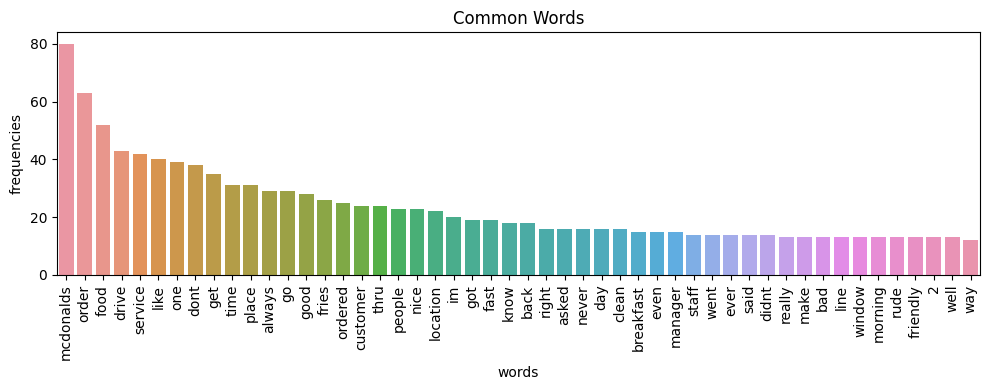

In [121]:
plt.figure(figsize=(10, 4))
plt.title("Common Words")
sns.barplot(x="words", y="frequencies", data=freq)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Stripping Out Common Words

In [122]:
other_stopwords = ["one", "get", "go", "im", "2", "thru", "tell", "says", "two"]

In [123]:
df["review_noother"] = df["review_nostop"].apply(
    lambda x: " ".join(word for word in x.split() if word not in other_stopwords)
)

In [125]:
df.head()

,reviews,word_count,char_count,stopword_count,review_lower,review_nopunc,review_nostop,review_noother
0,"It's not a 5-star retardant ofc, but as McDona...",128,689,56,"it's not a 5-star retardant ofc, but as mcdona...",its not a 5star retardant ofc but as mcdonalds...,5star retardant ofc mcdonalds goes go one one ...,5star retardant ofc mcdonalds goes well oiled ...
1,This place can get a little tricky and can hav...,76,354,38,this place can get a little tricky and can hav...,this place can get a little tricky and can hav...,place get little tricky lot going area sometim...,place little tricky lot going area sometimes c...
2,Ketchup in the bag. Yes of course sir. No ketc...,18,97,5,ketchup in the bag. yes of course sir. no ketc...,ketchup in the bag yes of course sir no ketchu...,ketchup bag yes course sir ketchup cold food b...,ketchup bag yes course sir ketchup cold food b...
3,This location was ok. Went there yesterday for...,41,210,15,this location was ok. went there yesterday for...,this location was ok went there yesterday for ...,location ok went yesterday cup coffee sandwich...,location ok went yesterday cup coffee sandwich...
4,They are now open 24 hours! Yay!!! Totally he...,17,93,5,they are now open 24 hours! yay!!! totally he...,they are now open 24 hours yay totally helped...,open 24 hours yay totally helped working late ...,open 24 hours yay totally helped working late ...


# 4. Lemmatize the Reviews

In [134]:
df["cleaned_review"] = df["review_noother"].apply(
    lambda x: " ".join(Word(word).lemmatize() for word in x.split())
)

In [140]:
print(df["reviews"].iloc[11])
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print(df["cleaned_review"].iloc[11])

This is a quick review of the mobile app pickup service at this location. There was a long line of cars at the drive-through so I used the mobile app instead of waiting in a long line.I actually pulled into one of the two mobile pickup spots and placed my order using the McDonald's mobile app. I had my food in less than five minutes. The guy literally ran it out for me. If you ever go to McDonald's, be sure and get their mobile app. Lots of good deals on it!It was a great experience and I wouldn't hesitate to use their mobile pickup service again.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
quick review mobile app pickup service location long line car drivethrough used mobile app instead waiting long linei actually pulled mobile pickup spot placed order using mcdonalds mobile app food le five minute guy literally ran ever mcdonalds sure mobile app lot good deal itit great experience wouldnt hesitate use mobile pickup service


# 5. Sentiment Analysis

In [143]:
df["polarity"] = df["cleaned_review"].apply(lambda x: TextBlob(x).sentiment[0])
df["subjectivity"] = df["cleaned_review"].apply(lambda x: TextBlob(x).sentiment[1])

In [146]:
df[["reviews", "polarity", "subjectivity"]].head()

,reviews,polarity,subjectivity
0,"It's not a 5-star retardant ofc, but as McDona...",-0.020833,0.533333
1,This place can get a little tricky and can hav...,0.152500,0.290000
2,Ketchup in the bag. Yes of course sir. No ketc...,-0.650000,0.833333
3,This location was ok. Went there yesterday for...,-0.120000,0.500000
4,They are now open 24 hours! Yay!!! Totally he...,0.125000,0.712500


In [151]:
print(df.iloc[2]["reviews"])

Ketchup in the bag. Yes of course sir. No ketchup. Cold food bad service. Shame to the franchise.


In [152]:
df["polarity"].min()

-1.0

In [155]:
df[df["polarity"] == -1.0].iloc[1]["reviews"]

"This has to be the worst McDonald's I've ever been to. We asked for a diet coke and a Dr. Pepper and the guy whose ONLY JOB is to fill drinks screwed it up and gave us both cokes. We also ordered an apple pie and didn't get it. Worst place ever :)"

In [157]:
df[df["polarity"] >= 0.7].iloc[0]["reviews"]

'I have never in my life had a triple cheeseburger with no pickles as good as this one!'